In [1]:
from camera import Camera
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [2]:
cam = Camera("camera1")
if cam.is_calibrated == False:
    cam.calibrate_and_draw("camera_cal/", 9, 6)

Initializing camera ...
Found config file ...
Loading configuration for camera ...
Done ...


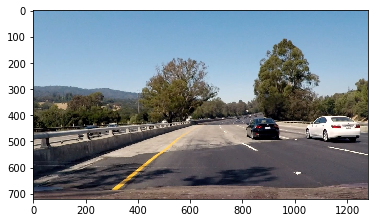

In [23]:
#image = mpimg.imread("../test_images/straight_lines2.jpg")
image = mpimg.imread("../test_images/test4.jpg")
image_top_left = (595,448)
image_top_right = (685,448)
image_bottom_left = (252, 678)
image_bottom_right = (1054,678)

birdeye_top_left = (400,20)
birdeye_top_right = (890,20)
birdeye_bottom_left = (400, 700)
birdeye_bottom_right = (890,700)

#cv2.line(image,top_left,bottom_left, [255, 0, 0], 2)
#cv2.line(image,top_right,bottom_right, [255, 0, 0], 2)
plt.imshow(image)

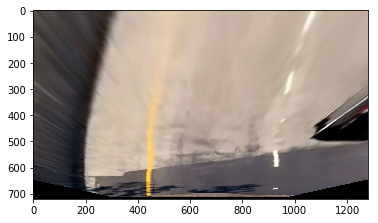

In [24]:
src = np.float32([top_left,bottom_left,top_right,bottom_right])
dst = np.float32([birdeye_top_left,birdeye_bottom_left,birdeye_top_right,birdeye_bottom_right])
cam.set_perspective_transform(src,dst)
warped = cam.perspective_transform(cam.undistort(image))
plt.imshow(warped)

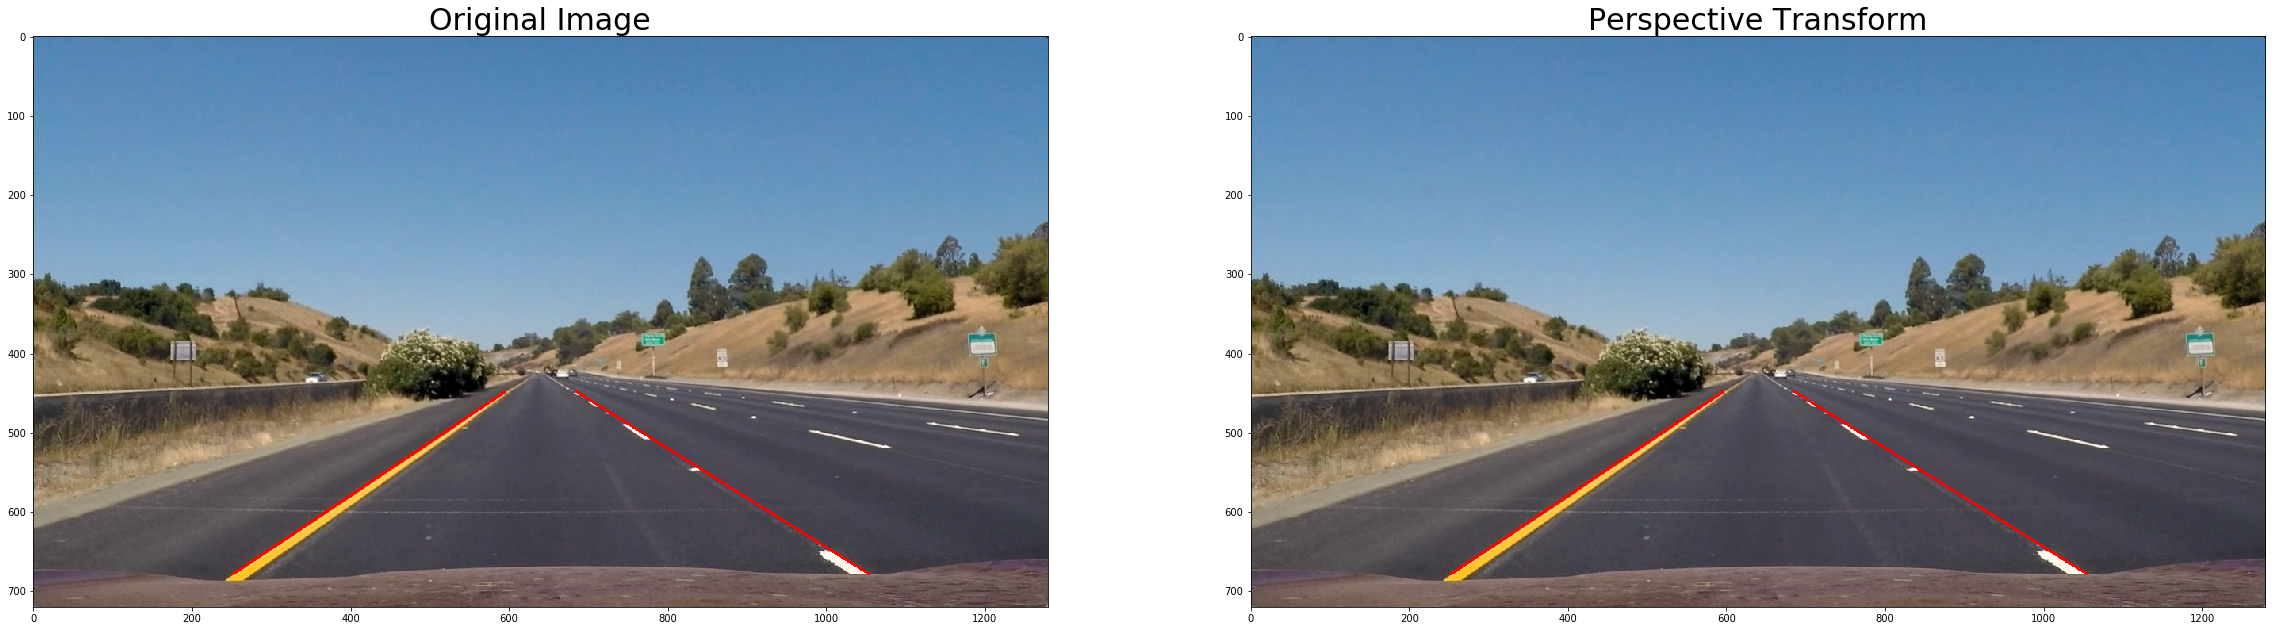

In [5]:
f, (ax11, ax12) = plt.subplots(1, 2, figsize=(40,20))
ax11.imshow(image)
ax11.set_title('Original Image', fontsize=30)
ax12.imshow(image, cmap='gray')
ax12.set_title('Perspective Transform', fontsize=30)
plt.show()